# This notebook can be used to understand torchvision.transforms

1. ToTensor() - It converts the PIL image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W) with a range [0.0, 1.0]. 
1. Normalize() - Normalizing the images means transforming the images into such values that the mean and standard deviation of the image become 0.0 and 1.0 respectively.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import torch
from torch import nn
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy
from tqdm import tqdm

In [3]:
from mnist_gan import get_root_path

In [4]:
PROJECT_PATH = get_root_path()
DATA_PATH = os.path.join(get_root_path(), "data")
try: 
    os.mkdir(DATA_PATH)
except Exception as e:
    print(e)

BATCH_SIZE = 60000

[Errno 17] File exists: '/home/mittal.nit/projects/mnist-gan/data'


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
#     transforms.Normalize(mean=(0.1307), std=(0.3081)),
#     transforms.Lambda(lambda x: x.flatten())
])

train_dataset = datasets.MNIST(
    root=os.path.join(DATA_PATH, "mnist_data"), train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(
    root=os.path.join(DATA_PATH, "mnist_data"), train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

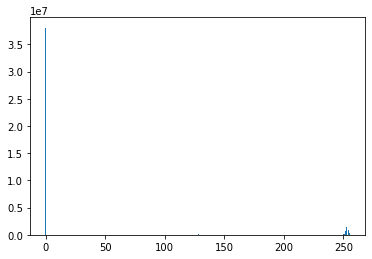

In [6]:
pixels, counts = train_dataset.data.unique(return_counts=True)
plt.bar(pixels, counts)
plt.show()

Here, the original data as values between 0 and 255. PIL image pixel values.

## Converting PIL images to tensor. 

Use of torchvision.transforms.ToTensor()

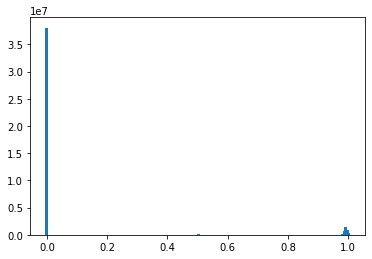

In [7]:
imgs, _ = next(iter(train_loader))
pixels, counts = imgs.unique(return_counts=True)
plt.bar(pixels, counts, width=.01)
plt.show()

After, converting PIL images to tensors, pixel values changes from [0, 255] to [0., 1.]. Pixels values are not normalized yet. Normalizing the images means transforming the images into such values that the mean and standard deviation of the image become 0.0 and 1.0 respectively.

## Normalization of pixel values

In [8]:
mean = (imgs.mean(),) # single channel image
std = (imgs.std(),) # single channel image

assert torch.allclose(std[0], torch.sqrt(((imgs - imgs.mean())**2).mean()))
mean, std

((tensor(0.1307),), (tensor(0.3081),))

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
#     transforms.Lambda(lambda x: x.flatten())
])

train_dataset = datasets.MNIST(
    root=os.path.join(DATA_PATH, "mnist_data"), train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(
    root=os.path.join(DATA_PATH, "mnist_data"), train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

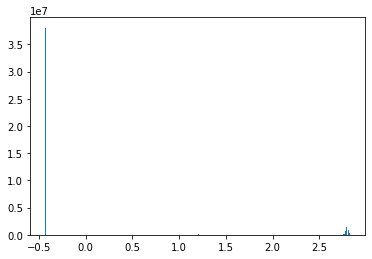

In [10]:
imgs, _ = next(iter(train_loader))
pixels, counts = imgs.unique(return_counts=True)
plt.bar(pixels, counts, width=.01)
plt.show()

In [11]:
imgs.mean(), imgs.std()

(tensor(-7.0741e-09), tensor(1.0000))